**Name:** Heart Health Classifier

**Author:** Sharome Burton

**Date:** 07/16/2021

**Description:** Machine learning model used to classify whether a patient has heart disease based on structured data. This notebook looks into using various Python-based machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

Approach:
1. Problem definition
2. Data (source: https://archive.ics.uci.edu/ml/datasets/Heart+Disease)
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition

> Given clinical parameters about a patient, are we able to predict whether they have heart disease?

## 2. Data

The original data came from Cleveland data from UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

Data is also available on Kaggle: https://www.kaggle.com/ronitf/heart-disease-uci

## 3. Evaluation

> Goal: Reach 90% accuracy at predicting whether a patient has heart disease during proof of concept

## 4. Features

Information about each feature in the dataset:

* age: age in years
* sex: sex (1 = male; 0 = female)
* cp: chest pain type
    - Value 1: typical angina
    - Value 2: atypical angina
    - Value 3: non-anginal pain
    - Value 4: asymptomatic 
* trestbps: resting blood pressure (in mm Hg on admission to the hospital)
* chol: serum cholestoral in mg/dl
* fbs: fasting blood sugar > 120 mg/dl
* restecg: resting electrocardiographic results (values 0,1,2)
* thalach: maximum heart rate achieved
* exang: exercise induced angina
* oldpeak: ST depression induced by exercise relative to rest
* slope: the slope of the peak exercise ST segment
* ca: number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect



## Preparing tools
Pandas, Matplotlib and NumPy will be used for data analysis and manipulation

In [1]:
# Import all tools needed

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Models from Scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve


In [2]:
df = pd.read_csv("data/heart-disease.csv")
df.shape #( rows, columns)

(303, 14)

## Exploratory data analysis or EDA

The goal is to become a subject matter expert on the dataset being worked with.

1. What question(s) are we trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do we deal with it?
4. Where are the outliers and why should we care about them?
5. How can we add, change or remove features from the dataset?

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
# Determine how many of each class there are in data set
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

<AxesSubplot:>

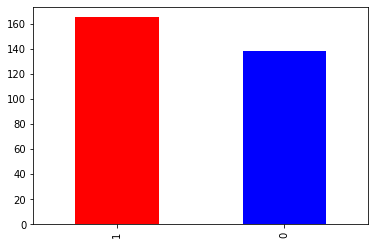

In [6]:
df["target"].value_counts().plot(kind="bar", color=["red", "blue"])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
# Checking whether there are any missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart disease frequency relation to sex

In [10]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [11]:
# Compare target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


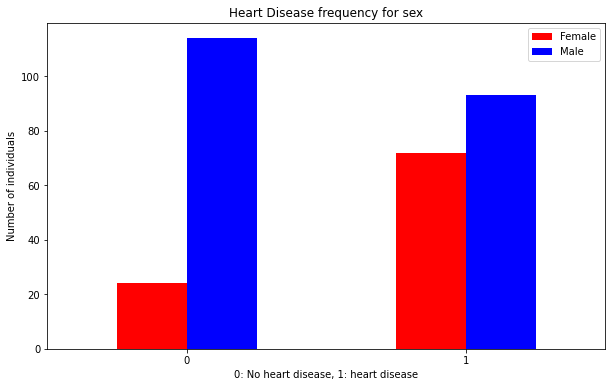

In [12]:
# Create a plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                   figsize=(10,6),
                                   color=["red","blue"])
plt.title("Heart Disease frequency for sex")
plt.xlabel("0: No heart disease, 1: heart disease")
plt.ylabel("Number of individuals")
plt.legend(["Female", "Male"]);
plt.xticks(rotation=0);

### Heart disease frequency relation to chest pain

In [13]:
df.cp.value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [14]:
# Compare target column with chest pain column
pd.crosstab(df.target, df.cp)

cp,0,1,2,3
target,,,,
0,104,9,18,7
1,39,41,69,16


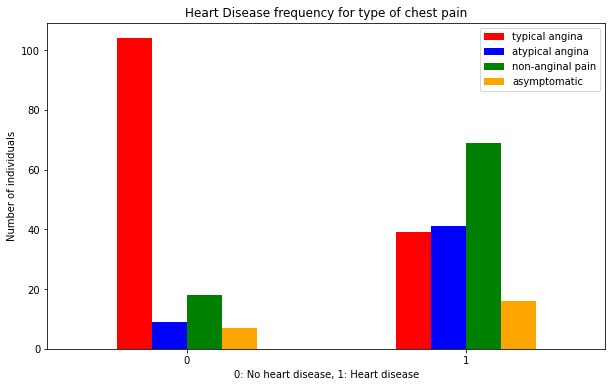

In [15]:
# Create a plot of crosstab
pd.crosstab(df.target, df.cp).plot(kind="bar",
                                   figsize=(10,6),
                                   color=["red","blue","green","orange"])
plt.title("Heart Disease frequency for type of chest pain")
plt.xlabel("0: No heart disease, 1: Heart disease")
plt.ylabel("Number of individuals")
plt.legend(["typical angina", "atypical angina", "non-anginal pain", "asymptomatic"]);
plt.xticks(rotation=0);

### Age. vs. max heart rate for heart disease

In [16]:
df["thalach"].value_counts()

162    11
163     9
160     9
152     8
173     8
       ..
128     1
129     1
134     1
137     1
202     1
Name: thalach, Length: 91, dtype: int64

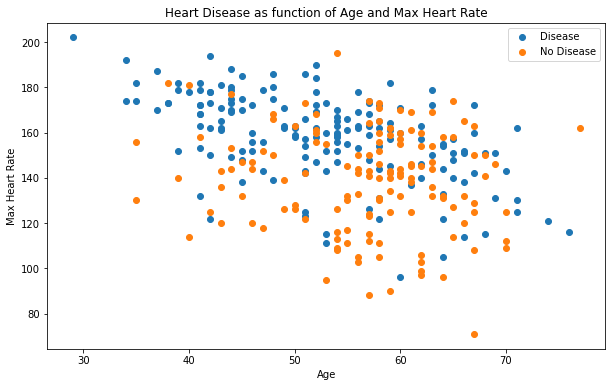

In [17]:
# Create another figure
plt.figure(figsize=(10,6))

# Scatter with positive examples
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1])

# Scatter with negative examples
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0])

# Add info
plt.title("Heart Disease as function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"])

<AxesSubplot:ylabel='Frequency'>

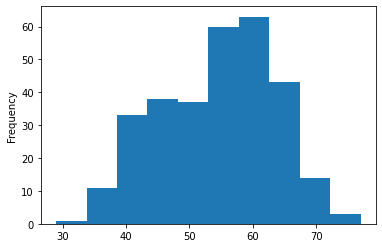

In [18]:
# Check distribution of age column with histogram
df.age.plot.hist()

In [19]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [20]:
# Make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [21]:
# Visualizing correlation

(14.5, -0.5)

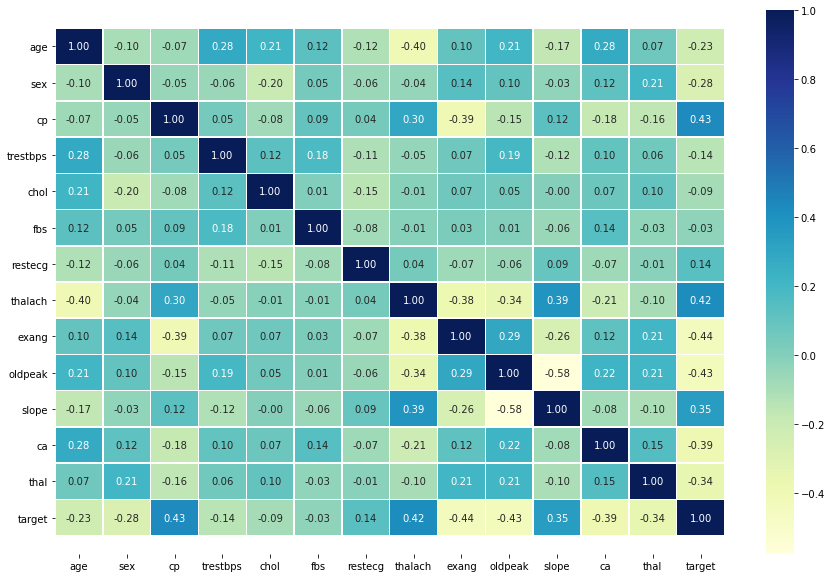

In [22]:
corr_matrix = df.corr()
fix, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

## 5. Modelling

In [23]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [24]:
# Split data into X and y
X = df.drop("target", axis=1)

y = df["target"]

In [25]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [26]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [27]:
# Split data into train and test sets
np.random.seed(18)

# Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.2)

In [28]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
34,51,1,3,125,213,0,0,125,1,1.4,2,1,2
17,66,0,3,150,226,0,1,114,0,2.6,0,0,2
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2
57,45,1,0,115,260,0,0,185,0,0.0,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2


In [29]:
y_train.head()

34    1
17    1
6     1
57    1
3     1
Name: target, dtype: int64

After splitting data into training and test sets, we will build a machine model and **train** it on the **training set**, and **test** it on the **test set**.

We will experiment with three different machine learning models:
1. Logistic Regression
2. K-Nearest Neighbors
3. Random Forest Classifier

In [30]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, XP_test, y_train, y_test):
   
    """
   Fits and evaluates given machine learning models.
   models: a dict of different Scikit_Learn machine learning models
   X_train: training data (no labels)
   X_test: testing data (no lables
   y_train: training labels
   y_test: test labels)
   """ 
    # Set random seed
    np.random.seed(18)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit model to data
        model.fit(X_train, y_train)
        # Evaluate model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)

    return model_scores
    
    

In [31]:
model_scores = fit_and_score(models,
                            X_train,
                             X_test,
                             y_train,
                             y_test)

model_scores

G:\ML_Projects\env\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8360655737704918,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8524590163934426}

### Model Comparison

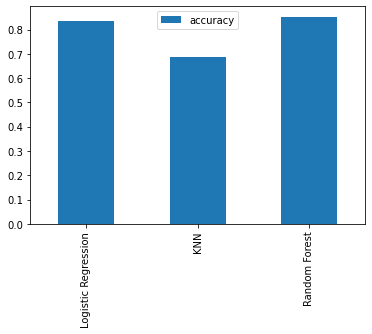

In [32]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

### Tuning Model

We will look at:
* Hyperparameter tuning
* Cross-validation
* Feature importance
* Confusion matrix
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under curve (AUC)

### Hyperparameter Tuning
1. by hand
2. RandomizedSearchCV
3. GridSearchCV

In [33]:
# Tuning KNN

train_scores = []
test_scores = []

# Create a list of different values for KNN
neighbors = range(1, 31)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit algorithm
    knn.fit(X_train, y_train)
    
    # Update training scores list
    train_scores.append(knn.score(X_train, y_train))
    
    # Update test scores list
    test_scores.append(knn.score(X_test, y_test))


In [34]:
train_scores

[1.0,
 0.7933884297520661,
 0.7603305785123967,
 0.768595041322314,
 0.7603305785123967,
 0.7355371900826446,
 0.731404958677686,
 0.7107438016528925,
 0.7107438016528925,
 0.7107438016528925,
 0.6900826446280992,
 0.6983471074380165,
 0.6859504132231405,
 0.6900826446280992,
 0.6859504132231405,
 0.6859504132231405,
 0.6859504132231405,
 0.6859504132231405,
 0.6859504132231405,
 0.6735537190082644,
 0.6694214876033058,
 0.6611570247933884,
 0.6694214876033058,
 0.6776859504132231,
 0.6776859504132231,
 0.6776859504132231,
 0.6694214876033058,
 0.6735537190082644,
 0.6776859504132231,
 0.6694214876033058]

In [35]:
test_scores

[0.5245901639344263,
 0.47540983606557374,
 0.6721311475409836,
 0.6065573770491803,
 0.6885245901639344,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.7377049180327869,
 0.7049180327868853,
 0.7540983606557377,
 0.6885245901639344,
 0.7049180327868853,
 0.6885245901639344,
 0.7049180327868853,
 0.7377049180327869,
 0.7377049180327869,
 0.7213114754098361,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7704918032786885,
 0.7377049180327869,
 0.7704918032786885,
 0.7377049180327869,
 0.7540983606557377,
 0.7540983606557377]

Max KNN score on test data: 77.05% accuracy


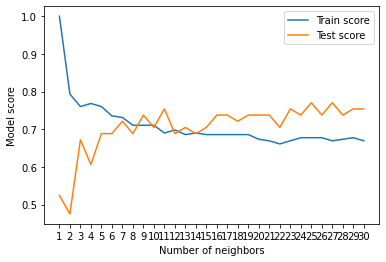

In [36]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1,31,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()


print(f'Max KNN score on test data: {max(test_scores)*100:.2f}% accuracy')

### Hyperparameter tuning with RandomizedSearchCV

We will tune:
* `LogisticRegression()`
* `RandomForestClassifier()`


In [62]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C":np.logspace(-25,25,100),
               "solver": ["liblinear"]}
# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10,1000,50),
           "max_depth": [None, 3,5,10],
          "min_samples_split": np.arange(2,20,2),
          "min_samples_leaf": np.arange(1,20,2)}

Tuning models using hyperparameter grid...

In [63]:
# Tune Logistic Regression

np.random.seed(18)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True
                               )

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-25, 3.19926714e-25, 1.02353102e-24, 3.27454916e-24,
       1.04761575e-23, 3.35160265e-23, 1.07226722e-22, 3.43046929e-22,
       1.09749877e-21, 3.51119173e-21, 1.12332403e-20, 3.59381366e-20,
       1.14975700e-19, 3.67837977e-19, 1.17681195e-18, 3.76493581e-18,
       1.20450354e-1...
       2.42012826e+13, 7.74263683e+13, 2.47707636e+14, 7.92482898e+14,
       2.53536449e+15, 8.11130831e+15, 2.59502421e+16, 8.30217568e+16,
       2.65608778e+17, 8.49753436e+17, 2.71858824e+18, 8.69749003e+18,
       2.78255940e+19, 8.90215085e+19, 2.84803587e+20, 9.11162756e+20,
       2.91505306e+21, 9.32603347e+21, 2.98364724e+22, 9.54548457e+22,
       3.05385551e+23, 9.77009957e+23, 3.12571585e+24, 1.00000000e+25]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [64]:
# Find best hyperparamaters
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.1747528400007683}

In [65]:
# Find best score
rs_log_reg.score(X_test, y_test)

0.8360655737704918

Tuning RandomForestClassifier()...

In [41]:
# Setup random seed
np.random.seed(18)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rf_grid,
                          cv=5,
                          n_iter=25,
                          verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=25,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [44]:
# Find best hyperparamaters
rs_rf.best_params_

{'n_estimators': 610,
 'min_samples_split': 16,
 'min_samples_leaf': 5,
 'max_depth': 3}

In [45]:
rs_rf.score(X_test,y_test)

0.8688524590163934

In [46]:
# Evaluate the randomized search RandomForestClassifier model
rs_rf.score(X_test, y_test)

0.8688524590163934

In [47]:
model_scores

{'Logistic Regression': 0.8360655737704918,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8524590163934426}

## Hyperparameter Tuning using GridSearchCV



In [72]:
# Different hyperparameters for LogisticRegression model
log_reg_grid = {"C": np.logspace(-4,4,200),
               "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid,
                         cv=5,
                         verbose=True)

# Fit grid hyperparameter seach model
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.09698580e-04, 1.20337784e-04, 1.32008840e-04,
       1.44811823e-04, 1.58856513e-04, 1.74263339e-04, 1.91164408e-04,
       2.09704640e-04, 2.30043012e-04, 2.52353917e-04, 2.76828663e-04,
       3.03677112e-04, 3.33129479e-04, 3.65438307e-04, 4.00880633e-04,
       4.39760361e-04, 4.82410870e-04, 5.291978...
       1.18953407e+03, 1.30490198e+03, 1.43145894e+03, 1.57029012e+03,
       1.72258597e+03, 1.88965234e+03, 2.07292178e+03, 2.27396575e+03,
       2.49450814e+03, 2.73644000e+03, 3.00183581e+03, 3.29297126e+03,
       3.61234270e+03, 3.96268864e+03, 4.34701316e+03, 4.76861170e+03,
       5.23109931e+03, 5.73844165e+03, 6.29498899e+03, 6.90551352e+03,
       7.57525026e+03, 8.30994195e+03, 9.11588830e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [74]:
# Check best hyperparams
gs_log_reg.best_params_

{'C': 0.19791668678535573, 'solver': 'liblinear'}

In [75]:
# Evaluate grid search LogisticRegression model
gs_log_reg.score(X_test, y_test)

0.8360655737704918

## Evaluating tuned machine learning classifier

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

To make comparisons and evaluate our trained model, we need to make predictions.

In [89]:
# Make predictions with tuned model
y_preds = rs_rf.predict(X_test)
y_preds

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1], dtype=int64)

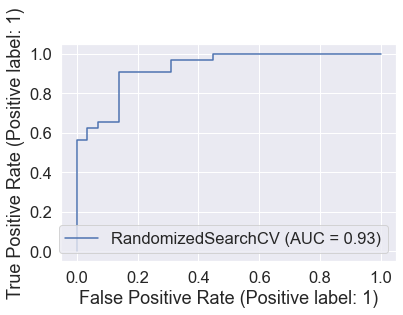

In [90]:
# Import ROC curve function from sklearn.metrics
# Plot ROC curve and calculate AUC metric for RandomForest
plot_roc_curve(rs_rf, X_test, y_test)

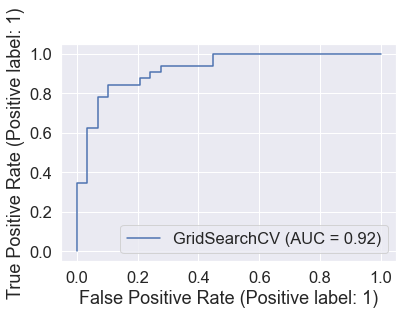

In [91]:
# Plot ROC curve and calculate AUC metric for Logistic Regression
plot_roc_curve(gs_log_reg, X_test, y_test)


In [92]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[24  5]
 [ 3 29]]


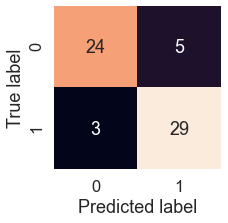

In [93]:
# Confusion matrix
import seaborn as sns
sns.set(font_scale=1.5) # Increase font size

def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("Predicted label") # predictions go on the x-axis
    plt.ylabel("True label") # true labels go on the y-axis 

plot_conf_mat(y_test, y_preds)

Classification report, cross-validated precision, recall and f1-score

In [94]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86        29
           1       0.85      0.91      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



### Calculate evaluation metrics using cross-validation

Calculate precision, recall and f1-score of our model using `cross_val_score()`

In [100]:
# Check best hyperparameters
rs_rf.best_params_

{'n_estimators': 610,
 'min_samples_split': 16,
 'min_samples_leaf': 5,
 'max_depth': 3}

In [186]:
# Create new classifier with best parameters
clf = RandomForestClassifier(n_estimators=610,
                             min_samples_split=16,
                             min_samples_leaf=5,
                             max_depth=3)

In [187]:
# Metrics to be cross-validated
metrics = ["accuracy", "precision", "recall", "f1" ]

# Cross-validation function
def cv_eval(metrics,X,y,cv):
    score_dict = {}
    for metric in metrics:
        print(metric)
        cv_score = cross_val_score(clf,
                        X,
                        y,
                        cv=cv,
                        scoring=str(metric))
        score_dict[metric] = np.mean(cv_score)
    return score_dict        

In [188]:
score_dict = cv_eval(metrics,X,y,5)

accuracy
precision
recall
f1


<AxesSubplot:title={'center':'Cross-validated classification metrics for Random Forest Classifier'}>

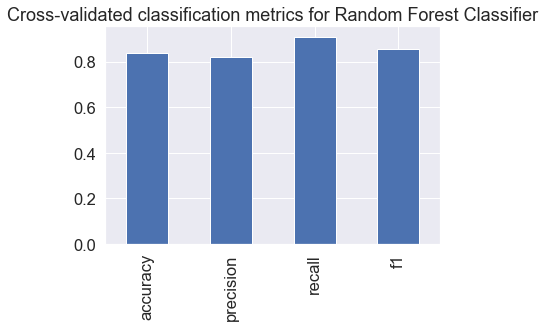

In [189]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame(score_dict,index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics for Random Forest Classifier",
                     legend=False)

### Feature Importance

Which features contributed most to the outcomes of the model and how did they contribute?

Finding feature importance is different for each machine learning model. One way to find feature importance is search the feature importance for that specific model on the internet.

For LogisticRegression...                         

In [190]:
# Fit an instance of LogisticRegression
clf = LogisticRegression(C=0.19791668678535573,
                        solver="liblinear")
clf.fit(X_train, y_train)

LogisticRegression(C=0.19791668678535573, solver='liblinear')

In [191]:
# Check coef_
clf.coef_

array([[ 0.01670864, -0.88805423,  0.74102503, -0.01899981, -0.00255565,
        -0.06298711,  0.16653097,  0.03038272, -0.53693437, -0.38607709,
         0.30383847, -0.61714442, -0.7993731 ]])

In [192]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [193]:
# Mach coef_'s of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.016708636011128302,
 'sex': -0.8880542329715303,
 'cp': 0.7410250312868009,
 'trestbps': -0.018999812696712776,
 'chol': -0.0025556467422050352,
 'fbs': -0.06298710513921664,
 'restecg': 0.16653097267729133,
 'thalach': 0.030382724304844122,
 'exang': -0.5369343675664704,
 'oldpeak': -0.38607709014376745,
 'slope': 0.30383846714967544,
 'ca': -0.6171444159657571,
 'thal': -0.7993731049463215}

<AxesSubplot:title={'center':'Feature Importance'}>

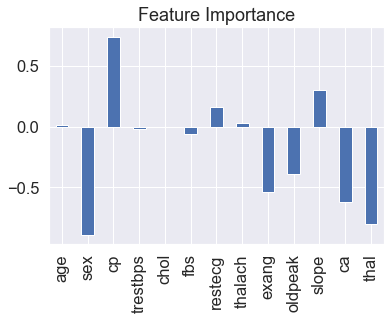

In [194]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False)

* age: age in years
* sex: sex (1 = male; 0 = female)
* cp: chest pain type
    - Value 1: typical angina
    - Value 2: atypical angina
    - Value 3: non-anginal pain
    - Value 4: asymptomatic 
* trestbps: resting blood pressure (in mm Hg on admission to the hospital)
* chol: serum cholestoral in mg/dl
* fbs: fasting blood sugar > 120 mg/dl
* restecg: resting electrocardiographic results (values 0,1,2)
* thalach: maximum heart rate achieved
* exang: exercise induced angina
* oldpeak: ST depression induced by exercise relative to rest
* slope: the slope of the peak exercise ST segment
* ca: number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

## 6. Experimentation

We haven't hit our evaluation metric of 90%...

We may:

* Collect more data
* Improve on current models
* Try another model such as CatBoost or XGBoost
